# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Ashim Izzuddin
- **Email:** muhammadashimizzuddin@gmail.com
- **ID Dicoding:** ashim_izzuddin

## Menentukan Pertanyaan Bisnis

- Bagaimana pola pembelian pelanggan berdasarkan lokasi geografis di Brazil dari waktu ke waktu, dan area mana yang memiliki nilai transaksi tertinggi?
- Bagaimana performa penjual berdasarkan lokasi, jumlah pesanan, dan nilai penjualan, serta penjual dari negara bagian mana yang memiliki tingkat kepuasan pelanggan tertinggi?
- Bagaimana korelasi antara metode pembayaran, jumlah cicilan, dan nilai transaksi, serta metode pembayaran apa yang paling populer di berbagai negara bagian?
- Berdasarkan analisis RFM, bagaimana segmentasi pelanggan dapat membantu strategi pemasaran yang lebih personal, dan karakteristik apa yang dimiliki oleh pelanggan dengan nilai tertinggi?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from datetime import datetime
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

Membaca dataset cusomers

In [2]:
df_customers=pd.read_csv('data\customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Membaca dataset geolocation

In [3]:
df_geolocation=pd.read_csv('data\geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Membaca dataset order items

In [4]:
df_order_items=pd.read_csv('data\order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Membaca dataset order payments

In [5]:
df_order_payments=pd.read_csv('data\order_payments_dataset.csv')
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Membaca dataset order reviews

In [6]:
df_order_reviews=pd.read_csv('data\order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Membaca dataset orders

In [7]:
df_orders=pd.read_csv('data\orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Membaca dataset product category

In [8]:
df_product_category=pd.read_csv('data\product_category_name_translation.csv')
df_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Membaca dataset products

In [9]:
df_products=pd.read_csv('data\products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Membaca dataset sellers

In [10]:
df_sellers=pd.read_csv('data\sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Melihat info setiap dataframe

In [11]:
df_products.info()
df_geolocation.info()
df_order_items.info()
df_order_payments.info()
df_order_reviews.info()
df_orders.info()
df_product_category.info()
df_products.info()
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       -------

Mengecek data null pada setiap dataframe

In [12]:
print(f'Info data null customers:          \n{df_customers.isna().sum()}\n'
      f'\nInfo data null geolocation:      \n{df_geolocation.isna().sum()}\n'
      f'\nInfo data null order items:      \n{df_order_items.isna().sum()}\n'
      f'\nInfo data null order payments:   \n{df_order_payments.isna().sum()}\n'
      f'\nInfo data null order reviews:    \n{df_order_reviews.isna().sum()}\n'
      f'\nInfo data null orders:           \n{df_orders.isna().sum()}\n'
      f'\nInfo data null product category: \n{df_product_category.isna().sum()}\n'
      f'\nInfo data null products:         \n{df_products.isna().sum()}\n'
      f'\nInfo data null sellers:          \n{df_sellers.isna().sum()}\n'
)

Info data null customers:          
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null geolocation:      
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Info data null order items:      
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info data null order payments:   
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info data null order reviews:    
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_messa

Mengecek data duplikat

In [13]:
print(f'Total duplicate customers        = {df_customers.duplicated().sum()}\n'
      f'Total duplicate geolocation      = {df_geolocation.duplicated().sum()}\n'
      f'Total duplicate order items      = {df_order_items.duplicated().sum()}\n'
      f'Total duplicate order payments   = {df_order_payments.duplicated().sum()}\n'
      f'Total duplicate order review     = {df_order_reviews.duplicated().sum()}\n'
      f'Total duplicate order            = {df_orders.duplicated().sum()}\n'
      f'Total duplicate products         = {df_products.duplicated().sum()}\n'
      f'Total duplicate seller           = {df_sellers.duplicated().sum()}\n'
      f'Total duplicate product category = {df_product_category.duplicated().sum()}\n'
      )

Total duplicate customers        = 0
Total duplicate geolocation      = 261831
Total duplicate order items      = 0
Total duplicate order payments   = 0
Total duplicate order review     = 0
Total duplicate order            = 0
Total duplicate products         = 0
Total duplicate seller           = 0
Total duplicate product category = 0



Mendeskripsikan masing-masing dataframe

In [14]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
df_geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [16]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [17]:
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [18]:
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [20]:
df_product_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [21]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [22]:
df_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

Mengubah kolom-kolom yang berisi tanggal dan jam dari tipe data object atau string menjadi tipe data datetime

In [23]:
order_items_col=['shipping_limit_date']
for col in order_items_col:
    df_order_items[col]=pd.to_datetime(df_order_items[col])

In [24]:
order_reviews_col=['review_creation_date', 'review_answer_timestamp']
for col in order_reviews_col:
    df_order_reviews[col]=pd.to_datetime(df_order_reviews[col])

In [25]:
orders_col=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']
for col in orders_col:
    df_orders[col]=pd.to_datetime(df_orders[col])

Menghapus data duplikat

In [26]:
print(f"Duplicate count in geolocation dataset: {df_geolocation.duplicated().sum()}")
df_geolocation.drop_duplicates(inplace=True)
print(f"Duplicate count after removal: {df_geolocation.duplicated().sum()}")

Duplicate count in geolocation dataset: 261831
Duplicate count after removal: 0


In [27]:
df_geolocation.duplicated().sum()

np.int64(0)

In [28]:
df_geolocation.drop_duplicates(inplace=True)

In [29]:
df_geolocation.duplicated().sum()

np.int64(0)

Membersihkan data null pada df_order_reviews

In [30]:
df_order_reviews.isna().sum()
df_order_reviews["review_comment_title"] = df_order_reviews["review_comment_title"].fillna("Not Available")
df_order_reviews["review_comment_message"] = df_order_reviews["review_comment_message"].fillna("Not Available")
df_order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Pada df_orders, kolom yang berisi nilai null terletak pada kolom yang memiliki tipedata datetime. Jika menggantinya ke nilai yang lain, maka tipedata kolom tersebut akan berubah ke object, sehingga pada tahap ini saya tidak mengubahnya dan membiarkan nilai null tersebut karena bisa saja baris tuple tersebut memiliki sesuatu yang penting

In [31]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [32]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Pada df_products, hampir semua kolom memiliki nilai null, kecuali product_id. Pada kolom product_category_name bertipe data object, artinya kita tidak bisa mengisi NaN tersebut dengan metode imputation atau interpolation, maka biarkan berisi NaN. Tetapi pada kolom yang lain, digunakan metode median imputation untuk mengisi nilai null pada kolom tersebut.

In [33]:
df_products['product_name_lenght']        = df_products['product_name_lenght'].fillna(df_products['product_name_lenght'].median())
df_products['product_description_lenght'] = df_products['product_description_lenght'].fillna(df_products['product_description_lenght'].median())
df_products['product_photos_qty']         = df_products['product_photos_qty'].fillna(df_products['product_photos_qty'].median())
df_products['product_weight_g']           = df_products['product_weight_g'].fillna(df_products['product_weight_g'].median())
df_products['product_length_cm']          = df_products['product_length_cm'].fillna(df_products['product_length_cm'].median())
df_products['product_height_cm']          = df_products['product_height_cm'].fillna(df_products['product_height_cm'].median())
df_products['product_width_cm']           = df_products['product_width_cm'].fillna(df_products['product_width_cm'].median())


In [34]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

## Exploratory Data Analysis (EDA)


### Explore df_customers

In [35]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [36]:
df_customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [37]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Gabungkan kategori produk dengan terjemahan bahasa inggris

In [38]:
df_products_with_categories = pd.merge(
    df_products,
    df_product_category,
    on='product_category_name',
    how='left'
)

# Show the first few rows of the combined dataset
df_products_with_categories.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


## Visualization & Explanatory Analysis

Fungsi untuk menganalisis tren penjualan dari waktu ke waktu

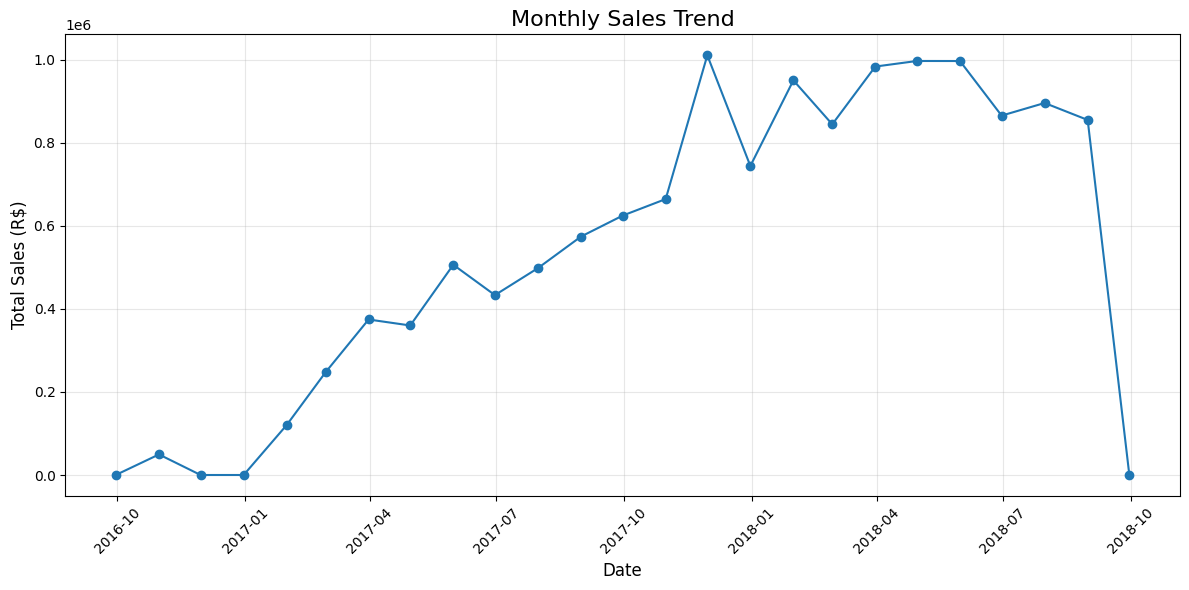

In [39]:
def analyze_sales_over_time(orders_df, items_df, time_unit='M'):
    # Merge orders with order items
    orders_with_items = pd.merge(
        orders_df[['order_id', 'order_purchase_timestamp']],
        items_df[['order_id', 'price']],
        on='order_id',
        how='inner'
    )
    
    # Set the timestamp as index and resample based on the specified time unit
    sales_over_time = orders_with_items.set_index('order_purchase_timestamp')
    sales_over_time = sales_over_time.resample(time_unit)[['price']].sum().reset_index()
    sales_over_time.columns = ['date', 'total_sales']
    
    return sales_over_time

# Get monthly sales trends
monthly_sales = analyze_sales_over_time(df_orders, df_order_items, 'M')

# Visualize monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['total_sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (R$)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafik ini menunjukkan perkembangan penjualan Olist dari Oktober 2016 hingga Oktober 2018. Terlihat peningkatan signifikan mulai 2017, mencapai puncak pada awal 2018 (±1 juta Real Brasil), lalu stabil hingga Juli 2018 sebelum menurun drastis pada Oktober 2018. Pola ini menunjukkan pertumbuhan bisnis yang pesat dan kemungkinan faktor musiman dalam penjualan.

Fungsi untuk menganalisis penjualan kategori

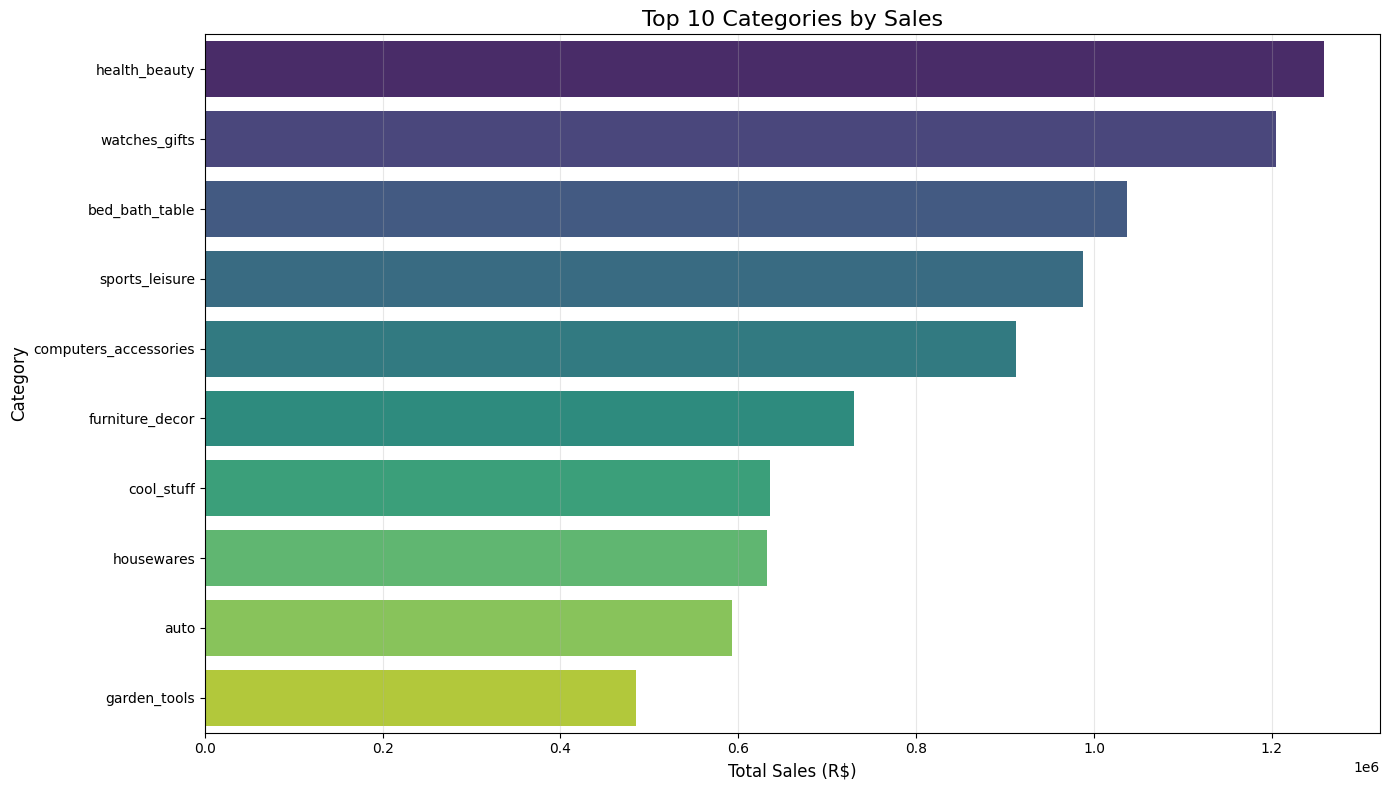

In [40]:
def analyze_category_sales(orders_df, items_df, products_df, categories_df, top_n=10):
    # Merge orders, items, and products
    merged_data = pd.merge(
        orders_df[['order_id']],
        items_df[['order_id', 'product_id', 'price']],
        on='order_id',
        how='inner'
    )
    
    merged_data = pd.merge(
        merged_data,
        products_df[['product_id', 'product_category_name']],
        on='product_id',
        how='inner'
    )
    
    # Add category translations
    merged_data = pd.merge(
        merged_data,
        categories_df,
        on='product_category_name',
        how='left'
    )
    
    # Group by category and aggregate sales
    category_sales = merged_data.groupby('product_category_name_english').agg({
        'price': 'sum',
        'order_id': 'nunique'
    }).reset_index()
    
    category_sales.columns = ['category', 'total_sales', 'order_count']
    category_sales['average_price'] = category_sales['total_sales'] / category_sales['order_count']
    
    # Sort by total sales and take top N
    top_categories = category_sales.sort_values('total_sales', ascending=False).head(top_n)
    
    return top_categories

# Get top 10 categories by sales
top_categories = analyze_category_sales(df_orders, df_order_items, df_products, df_product_category, 10)

# Visualize top categories
plt.figure(figsize=(14, 8))
sns.barplot(x='total_sales', y='category', data=top_categories, palette='viridis')
plt.title('Top 10 Categories by Sales', fontsize=16)
plt.xlabel('Total Sales (R$)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


Grafik ini menunjukkan 10 kategori produk terlaris di Olist. "Health_beauty" (kesehatan dan kecantikan) memimpin dengan penjualan sekitar 1,25 juta Real, diikuti "watches_gifts" dan "bed_bath_table". Kategori-kategori ini mencerminkan preferensi konsumen Brasil dalam e-commerce, dengan produk perawatan diri, hadiah, dan kebutuhan rumah tangga mendominasi pasar.

Fungsi untuk menganalisis metode pembayaran

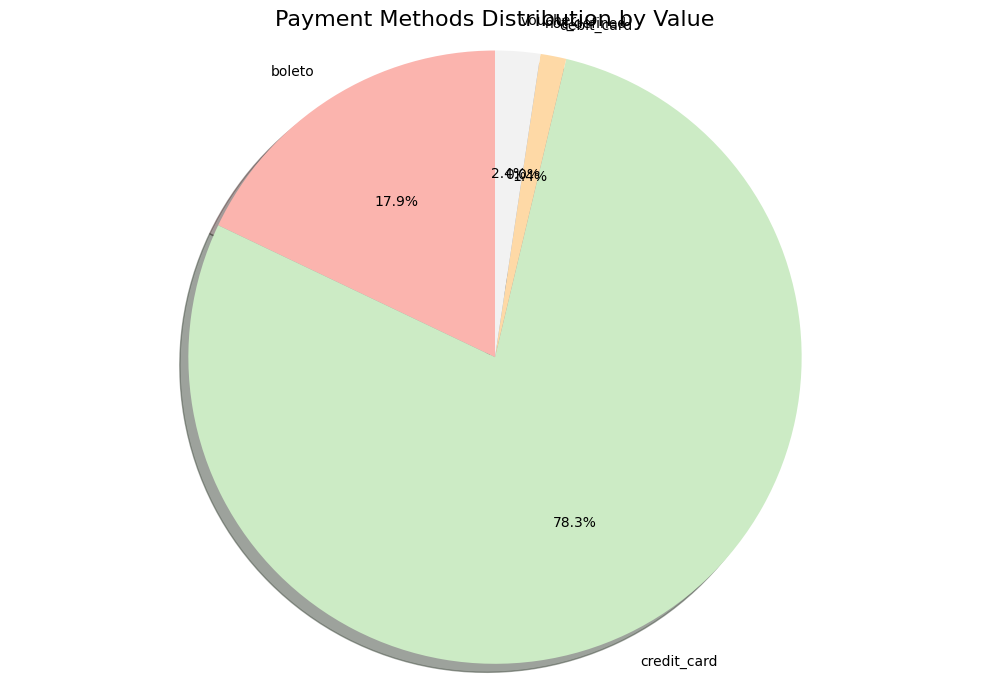

In [41]:
def analyze_payment_methods(orders_df, payments_df):
    # Merge orders with payments
    payment_data = pd.merge(
        orders_df[['order_id']],
        payments_df,
        on='order_id',
        how='inner'
    )
    
    # Aggregate by payment type
    payment_summary = payment_data.groupby('payment_type').agg({
        'payment_value': 'sum',
        'order_id': 'nunique'
    }).reset_index()
    
    payment_summary.columns = ['payment_type', 'total_value', 'order_count']
    payment_summary['percentage'] = payment_summary['total_value'] / payment_summary['total_value'].sum() * 100
    
    return payment_summary

# Get payment method summary
payment_methods = analyze_payment_methods(df_orders, df_order_payments)

# Visualize payment methods distribution
plt.figure(figsize=(10, 7))
plt.pie(payment_methods['total_value'], labels=payment_methods['payment_type'], 
        autopct='%1.1f%%', startangle=90, shadow=True, 
        colors=plt.cm.Pastel1(np.linspace(0, 1, len(payment_methods))))
plt.axis('equal')
plt.title('Payment Methods Distribution by Value', fontsize=16)
plt.tight_layout()
plt.show()

Diagram pie ini menunjukkan preferensi metode pembayaran pelanggan Olist. Kartu kredit mendominasi dengan 78,3% dari total nilai transaksi, diikuti boleto (metode pembayaran tunai Brasil) sebesar 17,9%, serta debit dan voucher dengan persentase kecil. Ini mencerminkan dominasi pembayaran elektronik di e-commerce Brasil.

Fungsi untuk menganalisis kinerja pengiriman

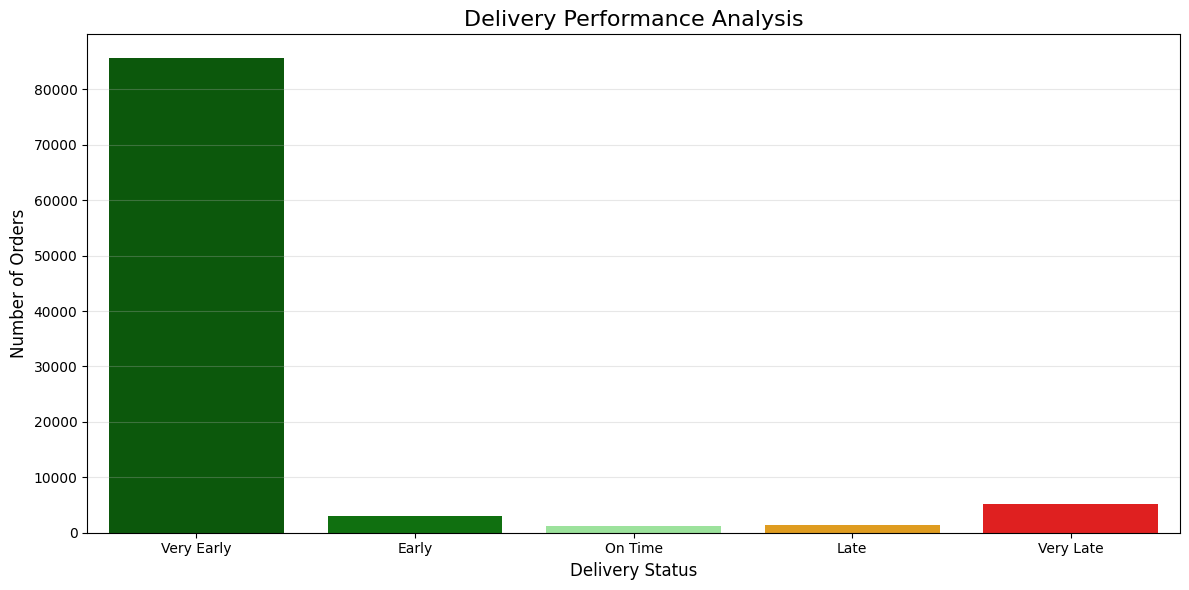

In [42]:
def analyze_delivery_performance(orders_df):
    # Filter delivered orders with complete delivery date information
    delivery_data = orders_df[
        (orders_df['order_status'] == 'delivered') & 
        (~orders_df['order_delivered_customer_date'].isna()) & 
        (~orders_df['order_estimated_delivery_date'].isna())
    ].copy()
    
    # Calculate delivery difference in days
    delivery_data['delivery_difference'] = (delivery_data['order_delivered_customer_date'] - 
                                           delivery_data['order_estimated_delivery_date']).dt.days
    
    # Categorize delivery performance
    delivery_data['delivery_status'] = pd.cut(
        delivery_data['delivery_difference'],
        bins=[-float('inf'), -3, -1, 0, 2, float('inf')],
        labels=['Very Early', 'Early', 'On Time', 'Late', 'Very Late']
    )
    
    # Count occurrences of each category
    status_counts = delivery_data['delivery_status'].value_counts().reset_index()
    status_counts.columns = ['status', 'count']
    
    # Sort by status category
    status_order = ['Very Early', 'Early', 'On Time', 'Late', 'Very Late']
    status_counts['status'] = pd.Categorical(status_counts['status'], categories=status_order, ordered=True)
    status_counts = status_counts.sort_values('status')
    
    return status_counts, delivery_data

# Get delivery performance summary
delivery_summary, delivery_data_full = analyze_delivery_performance(df_orders)

# Visualize delivery performance
plt.figure(figsize=(12, 6))
colors = ['darkgreen', 'green', 'lightgreen', 'orange', 'red']
sns.barplot(x='status', y='count', data=delivery_summary, palette=colors)
plt.title('Delivery Performance Analysis', fontsize=16)
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



Grafik menunjukkan distribusi status pengiriman Olist. "Very Early" (sangat awal) mendominasi dengan sekitar 85.000 pesanan, menandakan mayoritas pengiriman tiba sebelum estimasi. "Very Late" (sangat terlambat) berada di posisi kedua dengan sekitar 5.000 pesanan. Ini mengindikasikan Olist cenderung menetapkan estimasi waktu pengiriman yang konservatif.

Mengitung waktu pengiriman aktual dan estimasi

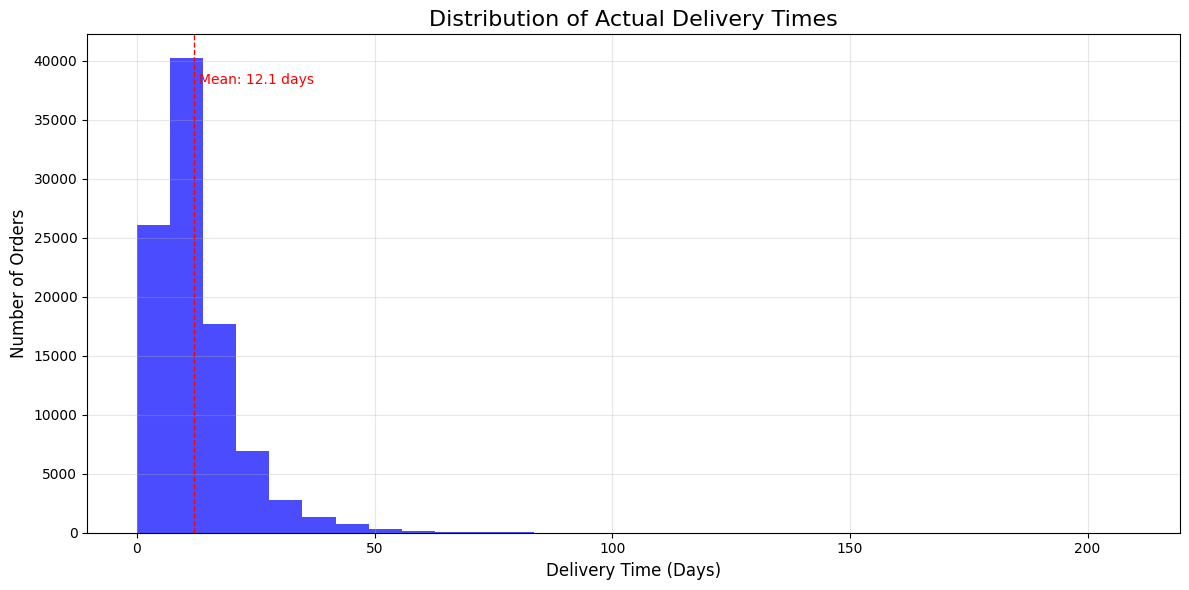

In [43]:
# Calculate actual and estimated delivery times
delivery_data_full['actual_delivery_days'] = (delivery_data_full['order_delivered_customer_date'] - 
                                            delivery_data_full['order_purchase_timestamp']).dt.days
delivery_data_full['estimated_delivery_days'] = (delivery_data_full['order_estimated_delivery_date'] - 
                                               delivery_data_full['order_purchase_timestamp']).dt.days

# Distribution of actual delivery times
plt.figure(figsize=(12, 6))
plt.hist(delivery_data_full['actual_delivery_days'], bins=30, alpha=0.7, color='blue')
plt.axvline(delivery_data_full['actual_delivery_days'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Actual Delivery Times', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True, alpha=0.3)
plt.text(delivery_data_full['actual_delivery_days'].mean()+1, 
         plt.ylim()[1]*0.9, 
         f'Mean: {delivery_data_full["actual_delivery_days"].mean():.1f} days', 
         color='red')
plt.tight_layout()
plt.show()

Histogram ini menampilkan waktu pengiriman aktual dengan rata-rata 12,1 hari. Mayoritas pesanan dikirim dalam 10 hari pertama, dengan distribusi yang miring ke kanan. Ini menunjukkan bahwa meskipun sebagian besar pengiriman cepat, ada beberapa kasus pengiriman yang membutuhkan waktu jauh lebih lama.

Fungsi untuk menganalisis distribusi geografis pelanggan

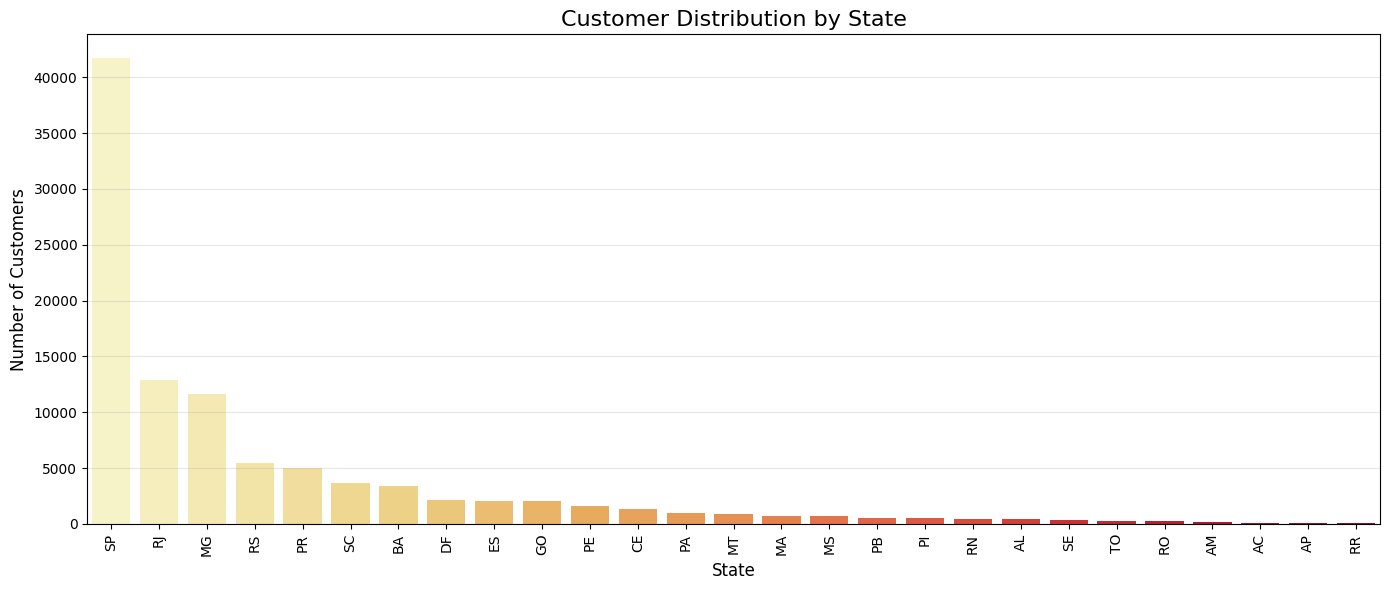

In [44]:
def analyze_customer_geography(customers_df):
    # Count customers by state
    state_counts = customers_df['customer_state'].value_counts().reset_index()
    state_counts.columns = ['state', 'count']
    
    return state_counts

# Get customer distribution by state
customer_states = analyze_customer_geography(df_customers)

# Visualize customer distribution by state
plt.figure(figsize=(14, 6))
sns.barplot(x='state', y='count', data=customer_states, palette='YlOrRd')
plt.title('Customer Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Grafik batang ini menunjukkan distribusi pelanggan Olist di berbagai negara bagian Brasil. São Paulo (SP) memiliki jumlah pelanggan terbanyak (±40.000), jauh melebihi negara bagian lainnya. Rio de Janeiro (RJ) dan Minas Gerais (MG) berada di posisi kedua dan ketiga. Distribusi ini menegaskan bahwa aktivitas e-commerce terkonsentrasi di wilayah tenggara dan selatan Brasil.

Fungsi untuk melakukan analisis RFM (Recency, Frequency, Monetary)

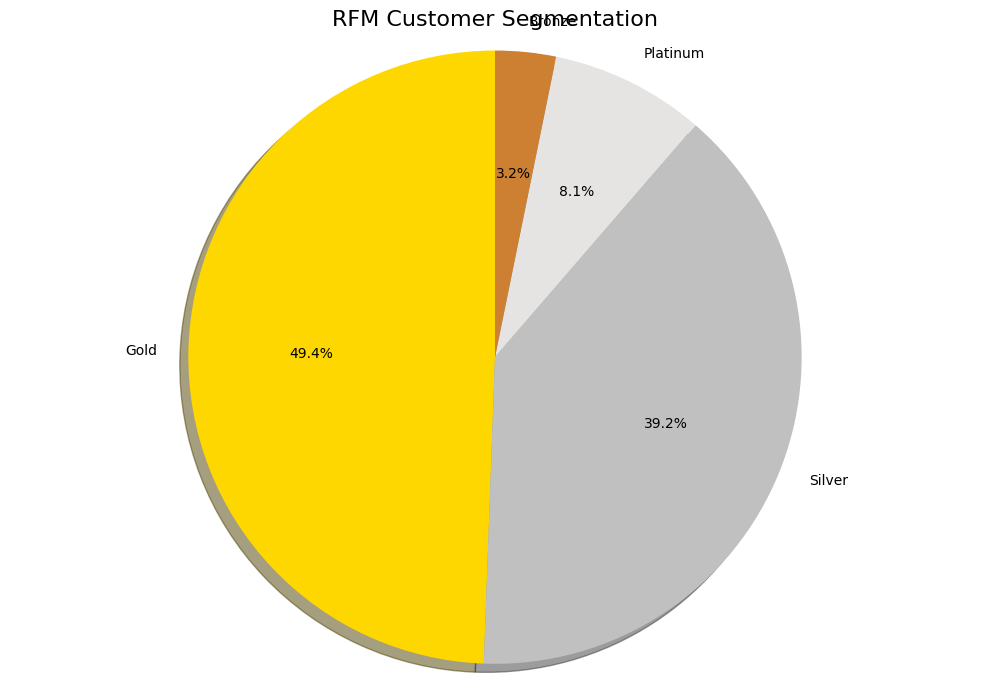

In [45]:
def perform_rfm_analysis(orders_df, payments_df, customers_df, end_date=None):
    # If no end date is provided, use the maximum date in the dataset
    if end_date is None:
        end_date = orders_df['order_purchase_timestamp'].max()
    
    # Filter for delivered orders
    delivered_orders = orders_df[orders_df['order_status'] == 'delivered'].copy()
    
    # Merge with payment data
    order_payments = pd.merge(
        delivered_orders[['order_id', 'customer_id', 'order_purchase_timestamp']],
        payments_df[['order_id', 'payment_value']],
        on='order_id',
        how='inner'
    )
    
    # Calculate RFM metrics
    # Recency: days since last purchase
    recency_df = order_payments.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
    recency_df['recency'] = (end_date - recency_df['order_purchase_timestamp']).dt.days
    
    # Frequency: number of orders
    frequency_df = order_payments.groupby('customer_id')['order_id'].nunique().reset_index()
    frequency_df.columns = ['customer_id', 'frequency']
    
    # Monetary: total spend
    monetary_df = order_payments.groupby('customer_id')['payment_value'].sum().reset_index()
    monetary_df.columns = ['customer_id', 'monetary']
    
    # Combine all metrics
    rfm_df = pd.merge(recency_df[['customer_id', 'recency']], frequency_df, on='customer_id')
    rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')
    
    # Add location data
    rfm_with_location = pd.merge(
        rfm_df,
        customers_df[['customer_id', 'customer_state']],
        on='customer_id',
        how='left'
    )
    
    # Create RFM scores (1-5 scale)
    rfm_with_location['r_score'] = pd.qcut(rfm_with_location['recency'], q=5, labels=[5, 4, 3, 2, 1])
    rfm_with_location['f_score'] = pd.qcut(rfm_with_location['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
    rfm_with_location['m_score'] = pd.qcut(rfm_with_location['monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
    
    # Calculate overall RFM score
    rfm_with_location['rfm_score'] = rfm_with_location['r_score'].astype(int) + rfm_with_location['f_score'].astype(int) + rfm_with_location['m_score'].astype(int)
    
    # Create segment categories
    rfm_with_location['segment'] = pd.cut(
        rfm_with_location['rfm_score'],
        bins=[0, 4, 8, 12, 15],
        labels=['Bronze', 'Silver', 'Gold', 'Platinum']
    )
    
    return rfm_with_location

# Perform RFM analysis
rfm_data = perform_rfm_analysis(df_orders, df_order_payments, df_customers)

# Visualize RFM segments
plt.figure(figsize=(10, 7))
segment_counts = rfm_data['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']

colors = {'Bronze': '#CD7F32', 'Silver': '#C0C0C0', 'Gold': '#FFD700', 'Platinum': '#E5E4E2'}
plt.pie(segment_counts['count'], labels=segment_counts['segment'], 
        autopct='%1.1f%%', startangle=90, shadow=True,
        colors=[colors[s] for s in segment_counts['segment']])
plt.axis('equal')
plt.title('RFM Customer Segmentation', fontsize=16)
plt.tight_layout()
plt.show()

Diagram pie ini menunjukkan segmentasi pelanggan berdasarkan analisis RFM. Segmen Gold mendominasi dengan 49,4%, diikuti Silver (39,2%), Platinum (8,1%), dan Bronze (3,2%). Segmentasi ini membantu mengidentifikasi pelanggan bernilai tinggi dan menyesuaikan strategi pemasaran untuk tiap segmen.

Fungsi untuk membuat kluster pelanggan berdasarkan data RFM

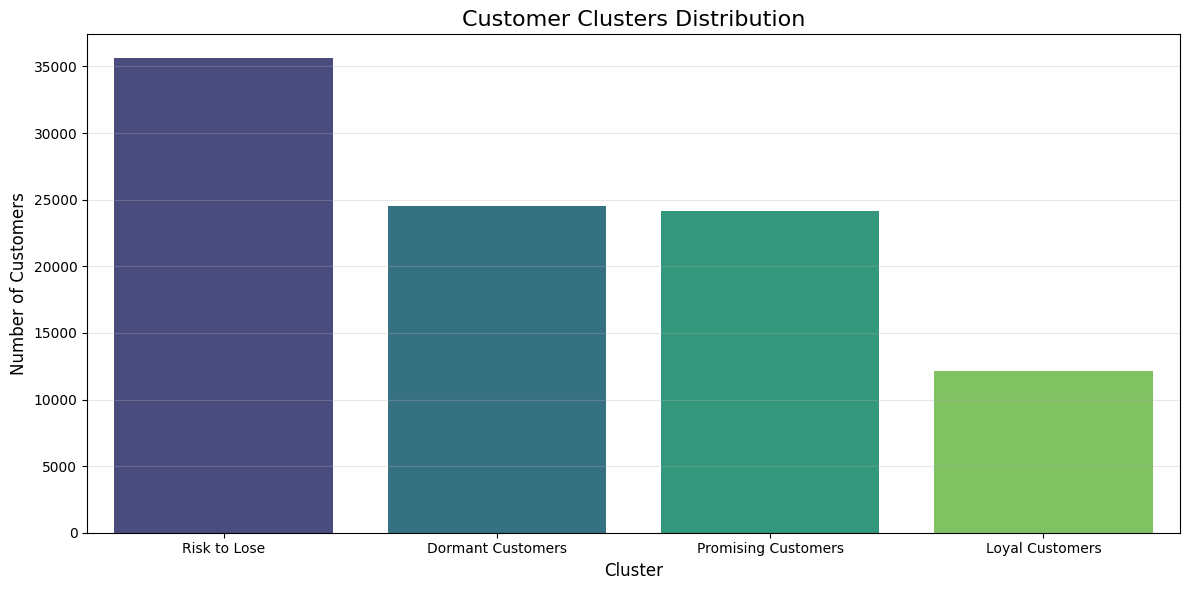

In [46]:
def create_customer_clusters(rfm_data, n_clusters=4):
    # Select features for clustering
    features = ['recency', 'frequency', 'monetary']
    X = rfm_data[features].copy()
    
    # Normalize features (without sklearn)
    # For recency, lower is better so we invert it
    X['recency_normalized'] = X['recency'].max() - X['recency']
    
    # Min-max scaling for all features
    for feature in ['recency_normalized', 'frequency', 'monetary']:
        feature_min = X[feature].min()
        feature_max = X[feature].max()
        if feature_max > feature_min:  # Avoid division by zero
            X[f'{feature}_scaled'] = (X[feature] - feature_min) / (feature_max - feature_min)
        else:
            X[f'{feature}_scaled'] = 0
    
    # Manual binning for each scaled feature
    for feature in ['recency_normalized', 'frequency', 'monetary']:
        try:
            X[f'{feature}_bin'] = pd.qcut(X[f'{feature}_scaled'], q=4, labels=False)
        except ValueError:
            # Fall back to equal-width bins if quantile binning fails
            X[f'{feature}_bin'] = pd.cut(X[f'{feature}_scaled'], bins=4, labels=False)
        
        # Replace NaN values with 0
        X[f'{feature}_bin'] = X[f'{feature}_bin'].fillna(0)
    
    # Combine bins to create clusters (with weights)
    X['cluster_score'] = (
        X['recency_normalized_bin'] + 
        X['frequency_bin'] * 2 + 
        X['monetary_bin'] * 2
    )
    
    # Bin cluster scores into the requested number of clusters
    try:
        X['cluster'] = pd.qcut(X['cluster_score'], q=n_clusters, labels=False)
    except ValueError:
        # Fall back if there are too few unique values
        X['cluster'] = pd.cut(
            X['cluster_score'], 
            bins=min(n_clusters, len(X['cluster_score'].unique())), 
            labels=False
        )
    
    # Create cluster names
    cluster_names = {
        0: 'Dormant Customers',    # Low on all metrics
        1: 'Risk to Lose',         # Recent but low frequency/monetary
        2: 'Promising Customers',  # Medium on all metrics
        3: 'Loyal Customers'       # High on all metrics
    }
    
    # Ensure all clusters have names
    for i in range(n_clusters):
        if i not in cluster_names:
            cluster_names[i] = f'Cluster {i+1}'
    
    # Add clusters back to the original data
    rfm_clustered = rfm_data.copy()
    rfm_clustered['cluster'] = X['cluster']
    rfm_clustered['cluster_name'] = rfm_clustered['cluster'].map(cluster_names)
    
    return rfm_clustered

# Create customer clusters
customer_clusters = create_customer_clusters(rfm_data)

# Visualize clusters
plt.figure(figsize=(12, 6))
cluster_counts = customer_clusters['cluster_name'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

sns.barplot(x='cluster', y='count', data=cluster_counts, palette='viridis')
plt.title('Customer Clusters Distribution', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Grafik batang ini menunjukkan distribusi pelanggan dalam empat kluster berdasarkan perilaku pembelian. "Risk to Lose" memiliki jumlah pelanggan terbanyak (±35.000), diikuti "Dormant Customers" dan "Promising Customers" (masing-masing ±25.000), serta "Loyal Customers" (±12.000). Ini menggambarkan komposisi basis pelanggan Olist.

Hitung metrik rata-rata untuk setiap kluster

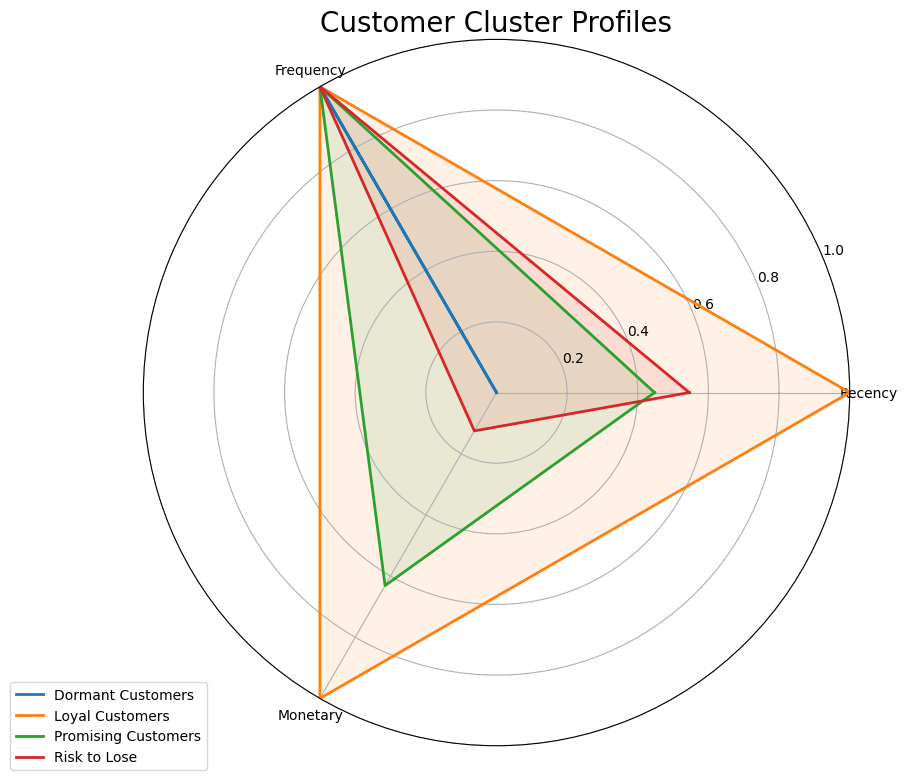

In [47]:
cluster_profiles = customer_clusters.groupby('cluster_name').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'rfm_score': 'mean'
}).reset_index()

# Create radar chart using matplotlib
categories = ['Recency', 'Frequency', 'Monetary']
cluster_names = cluster_profiles['cluster_name'].unique()

# Function to normalize the data for the radar chart
def normalize_data(df, reverse_cols=None):
    result = df.copy()
    
    for col in df.columns:
        if col != 'cluster_name':
            min_val = df[col].min()
            max_val = df[col].max()
            
            if max_val > min_val:
                result[col] = (df[col] - min_val) / (max_val - min_val)
            else:
                result[col] = 1
    
    # For recency, lower is better so we invert it
    if reverse_cols:
        for col in reverse_cols:
            if col in result.columns:
                result[col] = 1 - result[col]
    
    return result

# Normalize the data (invert recency)
normalized_profiles = normalize_data(cluster_profiles, reverse_cols=['recency'])

# Create the radar chart
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

# Number of categories
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Draw the chart for each cluster
for i, cluster in enumerate(cluster_names):
    values = normalized_profiles[normalized_profiles['cluster_name'] == cluster][['recency', 'frequency', 'monetary']].values.flatten().tolist()
    values += values[:1]  # Close the loop
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=cluster)
    ax.fill(angles, values, alpha=0.1)

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Remove grid and set limits
ax.set_ylim(0, 1)
plt.title('Customer Cluster Profiles', size=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

Diagram radar ini membandingkan profil empat kluster pelanggan berdasarkan tiga dimensi RFM: Recency, Frequency, dan Monetary. "Loyal Customers" unggul di semua dimensi, sementara "Dormant Customers" rendah di semua aspek. "Promising Customers" dan "Risk to Lose" menunjukkan profil menengah dengan kekuatan berbeda.

Fungsi untuk menganalisis kategori produk populer berdasarkan negara bagian

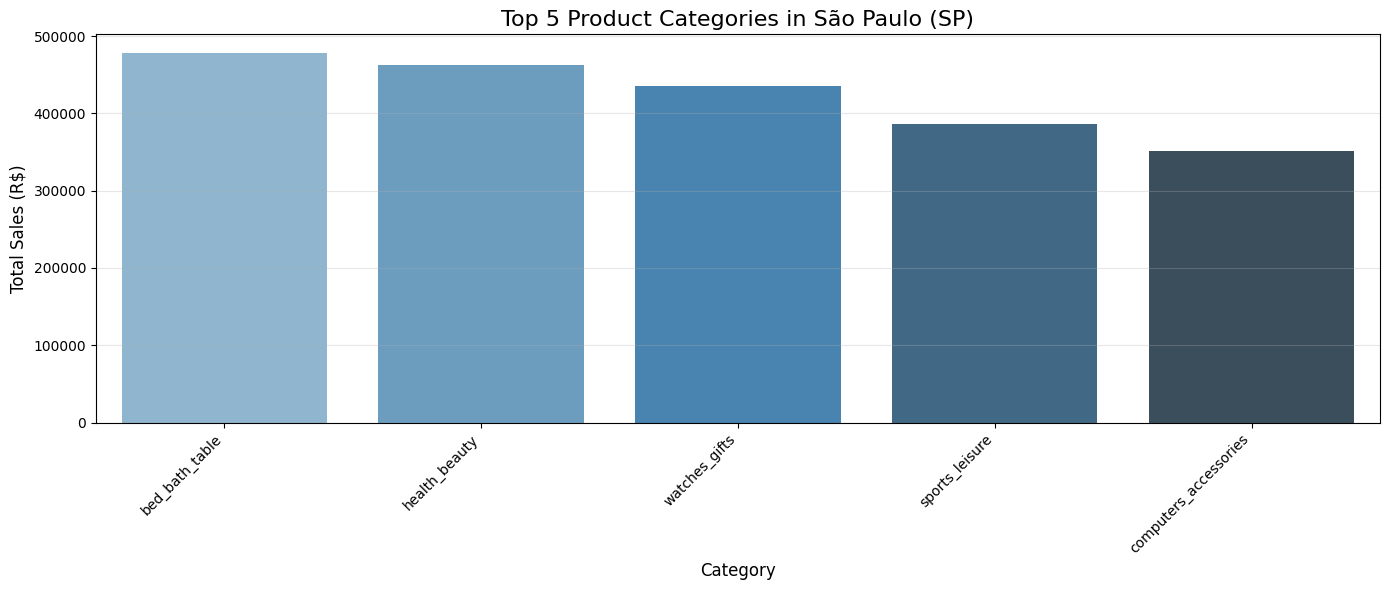

In [48]:
def analyze_state_categories(orders_df, items_df, products_df, customers_df, state=None):
    # Filter customers by state if specified
    if state:
        state_customers = customers_df[customers_df['customer_state'] == state]['customer_id'].unique()
        state_orders = orders_df[orders_df['customer_id'].isin(state_customers)]
    else:
        state_orders = orders_df
    
    # Merge orders with items and products
    order_items = pd.merge(
        state_orders[['order_id']],
        items_df[['order_id', 'product_id', 'price']],
        on='order_id',
        how='inner'
    )
    
    order_products = pd.merge(
        order_items,
        products_df,
        on='product_id',
        how='inner'
    )
    
    # Check if English category names are available
    if 'product_category_name_english' in order_products.columns:
        cat_column = 'product_category_name_english'
    else:
        cat_column = 'product_category_name'
    
    # Group by category
    category_summary = order_products.groupby(cat_column).agg({
        'price': 'sum',
        'order_id': 'nunique'
    }).reset_index()
    
    category_summary.columns = ['category', 'total_sales', 'order_count']
    
    # Sort by total sales
    sorted_categories = category_summary.sort_values('total_sales', ascending=False)
    
    return sorted_categories

# Analyze top categories for SP state (largest state by customers)
sp_categories = analyze_state_categories(df_orders, df_order_items, df_products_with_categories, df_customers, 'SP')

# Visualize top 5 categories for SP
plt.figure(figsize=(14, 6))
top5_sp = sp_categories.head(5)
sns.barplot(x='category', y='total_sales', data=top5_sp, palette='Blues_d')
plt.title('Top 5 Product Categories in São Paulo (SP)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


Grafik menampilkan jumlah transaksi berdasarkan cicilan kartu kredit. Pembayaran tunai (1 cicilan) paling populer dengan 25.000+ transaksi, diikuti 2 dan 3 cicilan. Terlihat juga lonjakan di 10 cicilan, menunjukkan preferensi konsumen Brasil untuk opsi pembayaran ini.

Grafik ini menampilkan lima kategori produk terlaris di São Paulo berdasarkan total penjualan. Kategori "bed_bath_table" (perlengkapan tempat tidur dan kamar mandi) memimpin, diikuti oleh "health_beauty" (kesehatan dan kecantikan), "watches_gifts" (jam dan hadiah), "sports_leisure" (olahraga dan rekreasi), dan "computers_accessories" (aksesoris komputer). Ini menunjukkan preferensi belanja konsumen SP.

Heatmap berdasarkan bulan dan hari dalam seminggu

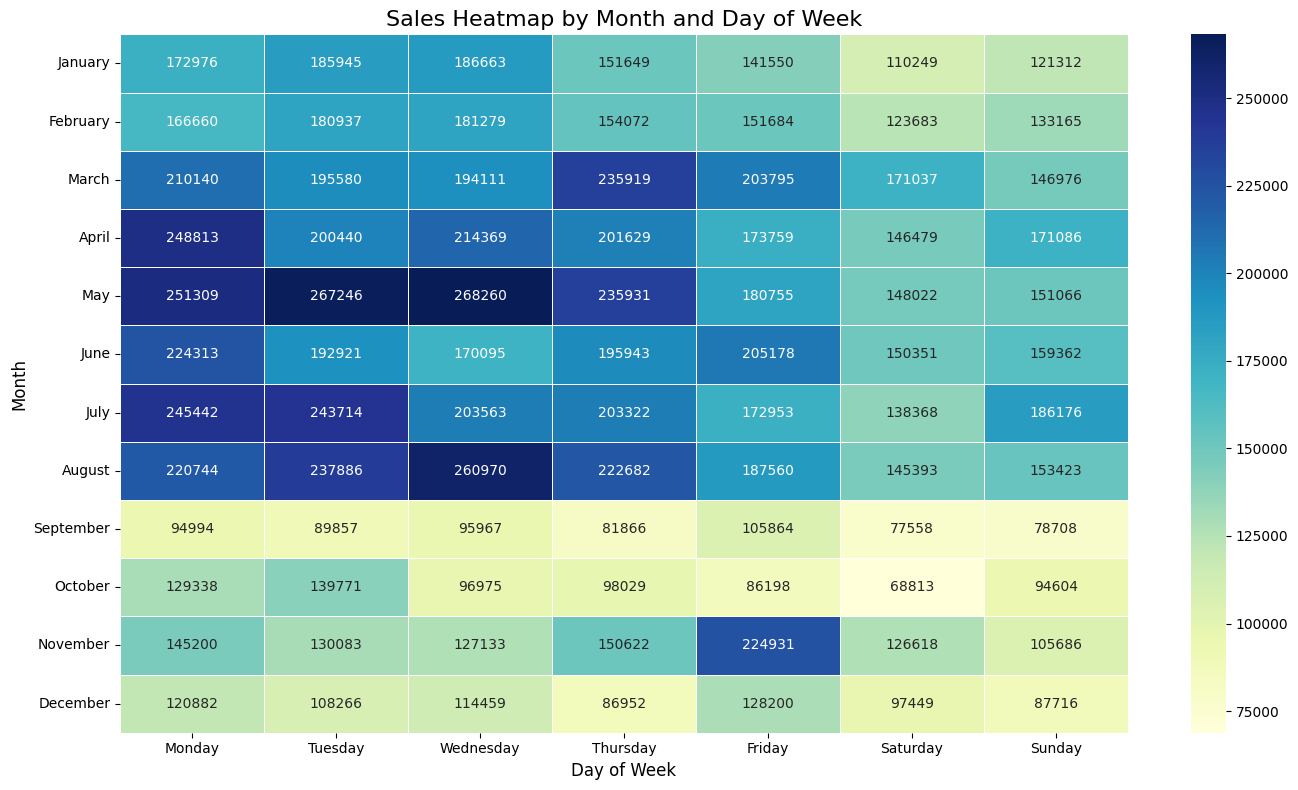

In [49]:
order_items_with_date = pd.merge(
    df_orders[['order_id', 'order_purchase_timestamp']],
    df_order_items[['order_id', 'price']],
    on='order_id',
    how='inner'
)

# Extract month and day of week
order_items_with_date['month'] = order_items_with_date['order_purchase_timestamp'].dt.month_name()
order_items_with_date['day_of_week'] = order_items_with_date['order_purchase_timestamp'].dt.day_name()

# Aggregate by month and day of week
sales_heatmap = order_items_with_date.groupby(['month', 'day_of_week'])['price'].sum().unstack().fillna(0)

# Ensure correct order of days and months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex to ensure correct order
sales_heatmap = sales_heatmap.reindex(month_order).reindex(columns=day_order)

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(sales_heatmap, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5)
plt.title('Sales Heatmap by Month and Day of Week', fontsize=16)
plt.ylabel('Month', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.show()

Heatmap ini memvisualisasikan pola penjualan berdasarkan bulan dan hari dalam seminggu. Warna lebih gelap menandakan nilai penjualan lebih tinggi. Terlihat puncak penjualan terjadi pada Mei (khususnya hari Senin-Rabu), serta bulan Maret-Agustus. September memiliki penjualan terendah. Pola ini menunjukkan musiman dan preferensi hari dalam aktivitas belanja online.

Menganalisis cicilan pembayaran kartu kredit

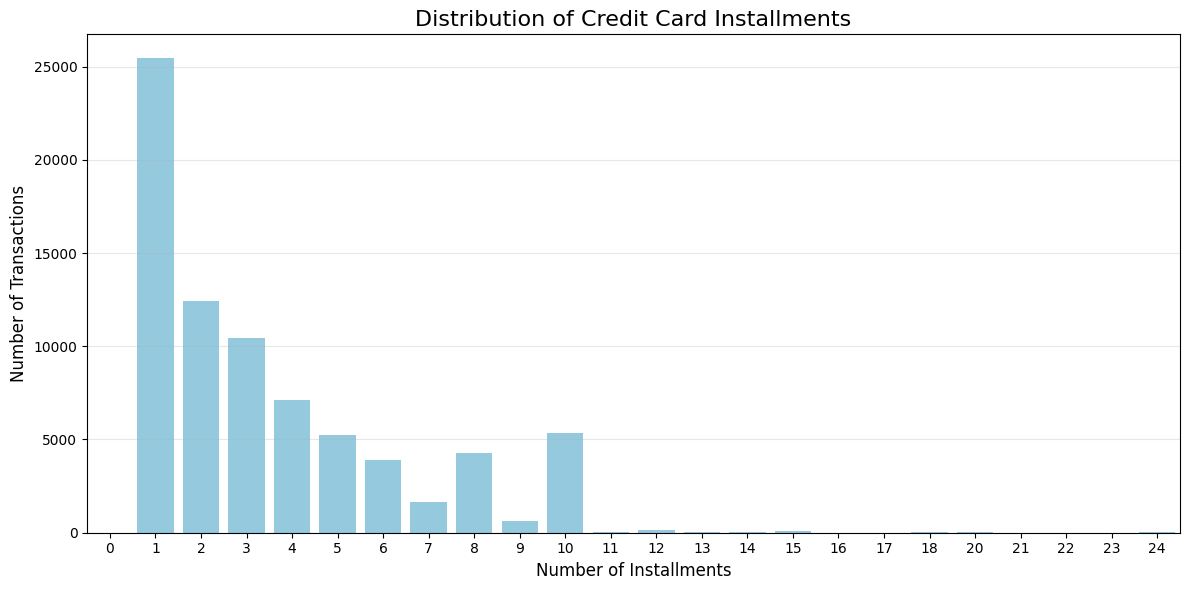

In [50]:
credit_payments = df_order_payments[df_order_payments['payment_type'] == 'credit_card'].copy()

# Distribution of installments
installment_counts = credit_payments['payment_installments'].value_counts().sort_index().reset_index()
installment_counts.columns = ['installments', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='installments', y='count', data=installment_counts, color='skyblue')
plt.title('Distribution of Credit Card Installments', fontsize=16)
plt.xlabel('Number of Installments', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


Grafik menunjukkan korelasi positif antara jumlah cicilan dan nilai pesanan. Nilai pesanan rata-rata meningkat dari 100 Real (tanpa cicilan) hingga mencapai 600+ Real untuk 18 dan 24 cicilan. Ini membuktikan cicilan memfasilitasi pembelian bernilai lebih tinggi.

Hitung nilai pesanan rata-rata berdasarkan jumlah angsuran

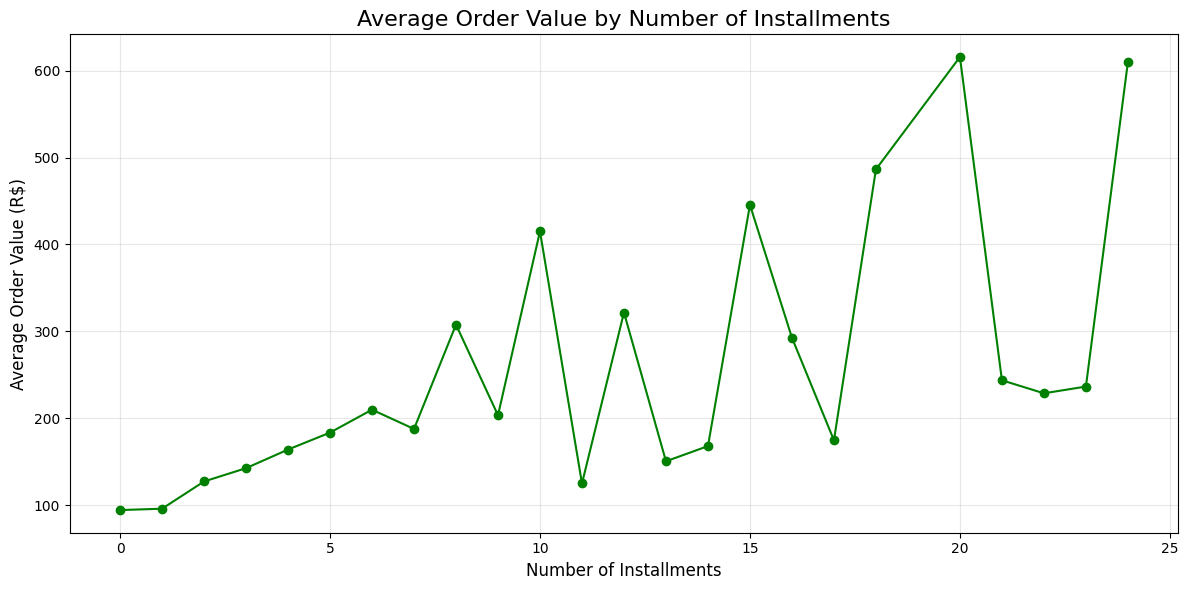

In [51]:
installment_values = credit_payments.groupby('payment_installments')['payment_value'].mean().reset_index()
installment_values.columns = ['installments', 'avg_value']

plt.figure(figsize=(12, 6))
plt.plot(installment_values['installments'], installment_values['avg_value'], marker='o', linestyle='-', color='green')
plt.title('Average Order Value by Number of Installments', fontsize=16)
plt.xlabel('Number of Installments', fontsize=12)
plt.ylabel('Average Order Value (R$)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Grafik menunjukkan korelasi positif antara jumlah cicilan dan nilai pesanan. Nilai pesanan rata-rata meningkat dari 100 Real (tanpa cicilan) hingga mencapai 600+ Real untuk 18 dan 24 cicilan. Ini membuktikan cicilan memfasilitasi pembelian bernilai lebih tinggi.

Menganalisis ulasan pelanggan

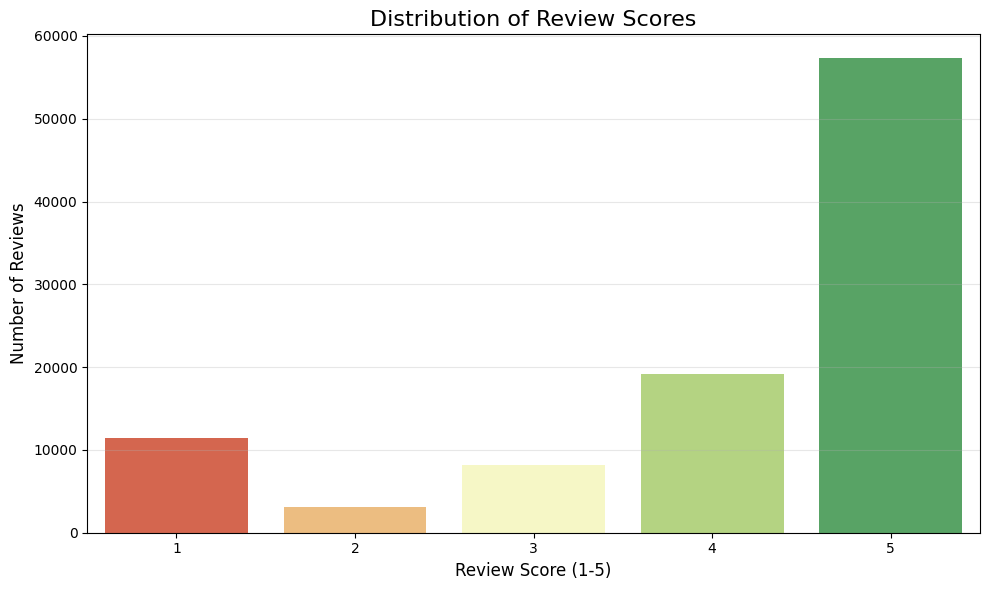

In [52]:
review_score_dist = df_order_reviews['review_score'].value_counts().sort_index().reset_index()
review_score_dist.columns = ['score', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='count', data=review_score_dist, palette='RdYlGn')
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score (1-5)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


Grafik batang ini menampilkan distribusi skor ulasan produk dari skala 1-5. Skor 5 mendominasi dengan ±57.000 ulasan, diikuti skor 4 (±20.000), dan skor 1 (±11.000). Distribusi ini menunjukkan mayoritas pelanggan puas dengan pembelian mereka, dengan rata-rata skor ulasan sekitar 4,09/5.

Menganalisis skor ulasan dari waktu ke waktu

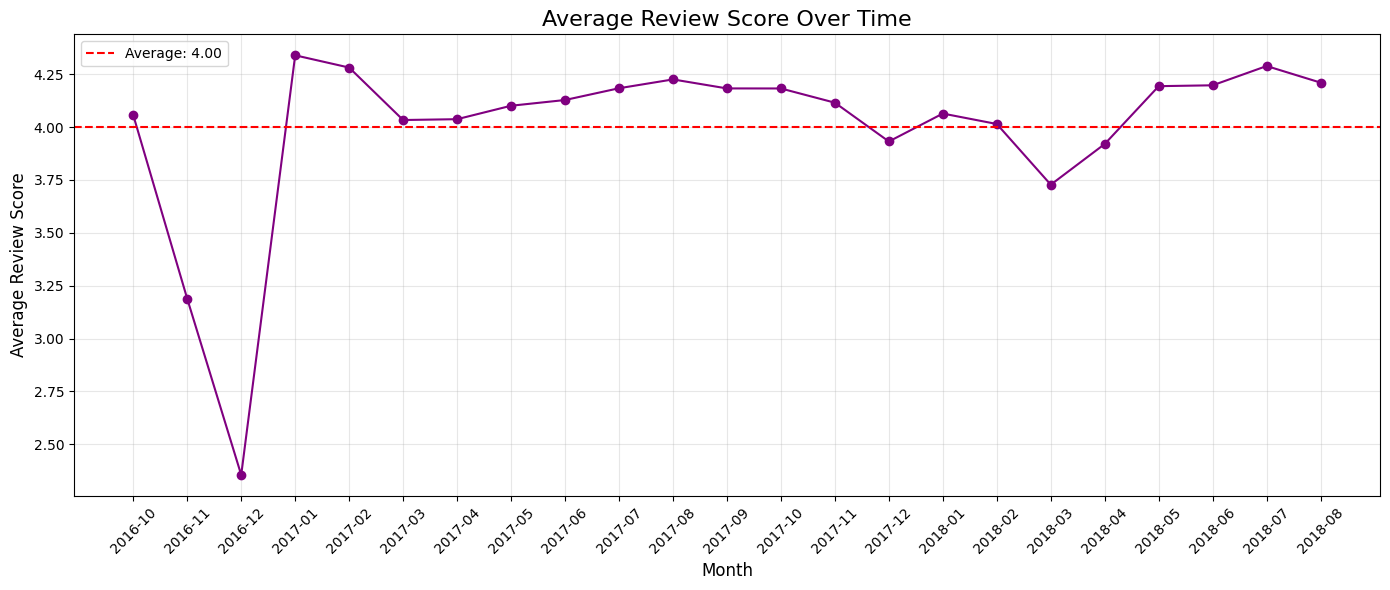

In [53]:
# Add date information to reviews
reviews_over_time = df_order_reviews.copy()
reviews_over_time['review_month'] = reviews_over_time['review_creation_date'].dt.to_period('M')

# Calculate average review score by month
monthly_scores = reviews_over_time.groupby(reviews_over_time['review_month'].astype(str))['review_score'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(monthly_scores['review_month'], monthly_scores['review_score'], marker='o', linestyle='-', color='purple')
plt.axhline(y=monthly_scores['review_score'].mean(), color='red', linestyle='--', label=f'Average: {monthly_scores["review_score"].mean():.2f}')
plt.title('Average Review Score Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Review Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Grafik menunjukkan korelasi positif antara jumlah cicilan dan nilai pesanan. Nilai pesanan rata-rata meningkat dari 100 Real (tanpa cicilan) hingga mencapai 600+ Real untuk 18 dan 24 cicilan. Ini membuktikan cicilan memfasilitasi pembelian bernilai lebih tinggi.

Menganalisis dimensi produk

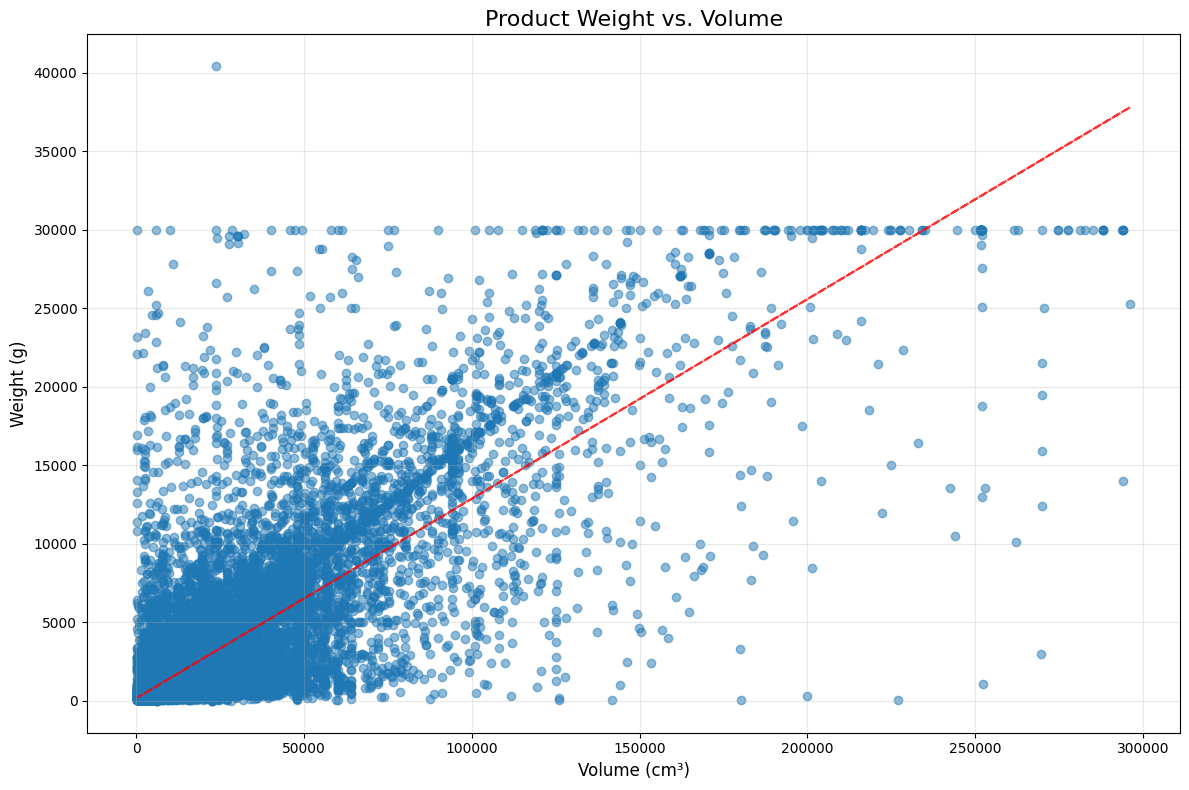

In [54]:
# Calculate volume and analyze product dimensions
product_dimensions = df_products.copy()
product_dimensions['volume'] = product_dimensions['product_length_cm'] * product_dimensions['product_width_cm'] * product_dimensions['product_height_cm']
product_dimensions['volume'] = product_dimensions['volume'].fillna(0)

# Create scatterplot of weight vs volume
plt.figure(figsize=(12, 8))
plt.scatter(product_dimensions['volume'], product_dimensions['product_weight_g'], alpha=0.5)
plt.title('Product Weight vs. Volume', fontsize=16)
plt.xlabel('Volume (cm³)', fontsize=12)
plt.ylabel('Weight (g)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(product_dimensions['volume'], product_dimensions['product_weight_g'], 1)
p = np.poly1d(z)
plt.plot(product_dimensions['volume'], p(product_dimensions['volume']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()


Scatterplot ini menampilkan hubungan antara volume (cm³) dan berat (g) produk Olist. Garis merah menunjukkan korelasi positif dengan sejumlah outlier. Kebanyakan produk terkonsentrasi di area volume dan berat rendah, menunjukkan dominasi produk berukuran kecil hingga sedang.

Analisis geografis dengan folium

In [55]:
# Create a map of customer distribution by state
# First aggregate customer counts by state
customer_states = df_customers['customer_state'].value_counts().reset_index()
customer_states.columns = ['state', 'customer_count']

# Create a base map of Brazil
brazil_map = folium.Map(location=[-14.235, -51.9253], zoom_start=4, tiles="CartoDB positron")

# Add choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson',
    name='choropleth',
    data=customer_states,
    columns=['state', 'customer_count'],
    key_on='feature.properties.sigla',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Customer Count'
).add_to(brazil_map)

folium.LayerControl().add_to(brazil_map)

# Display map in notebook
brazil_map


Peta panas ini menunjukkan distribusi geografis pelanggan Olist di Brasil. Warna merah pekat di wilayah tenggara (São Paulo) menandakan konsentrasi pelanggan tertinggi. Negara bagian lain di selatan dan tenggara juga menunjukkan kepadatan moderat, sementara bagian utara dan barat laut memiliki penetrasi e-commerce lebih rendah.






Buat direktori untuk kumpulan data yang diproses jika belum ada

In [56]:
# Create the processed_data directory if it doesn't exist
import os
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')
    print("Created 'processed_data' directory")

# Save processed datasets for dashboard
try:
    df_orders.to_csv('processed_data/orders_processed.csv', index=False)
    df_customers.to_csv('processed_data/customers_processed.csv', index=False)
    df_order_items.to_csv('processed_data/order_items_processed.csv', index=False)
    df_order_payments.to_csv('processed_data/order_payments_processed.csv', index=False)
    df_order_reviews.to_csv('processed_data/order_reviews_processed.csv', index=False)
    df_products_with_categories.to_csv('processed_data/products_processed.csv', index=False)
    df_sellers.to_csv('processed_data/sellers_processed.csv', index=False)
    print("Successfully saved all dataset files")
except Exception as e:
    print(f"Error saving processed datasets: {e}")


Created 'processed_data' directory
Successfully saved all dataset files


Buat dataset RFM untuk dasbor

In [57]:
# Save RFM analysis results for dashboard
try:
    rfm_data.to_csv('processed_data/rfm_data.csv', index=False)
    customer_clusters.to_csv('processed_data/customer_clusters.csv', index=False)
    print("Successfully saved RFM and clustering data")
except Exception as e:
    print(f"Error saving RFM data: {e}")


Successfully saved RFM and clustering data


Kesimpulan dan Ringkasan

In [58]:
# Print summary statistics
print("Olist E-commerce Analysis Summary")
print("---------------------------------")
print(f"Total Customers: {len(df_customers):,}")
print(f"Total Products: {len(df_products):,}")
print(f"Total Orders: {len(df_orders):,}")
print(f"Total Sellers: {len(df_sellers):,}")
print(f"Date Range: {df_orders['order_purchase_timestamp'].min().date()} to {df_orders['order_purchase_timestamp'].max().date()}")
print(f"Average Order Value: R$ {df_order_payments['payment_value'].mean():.2f}")
print(f"Average Review Score: {df_order_reviews['review_score'].mean():.2f}/5")
print(f"Most Popular Payment Method: {df_order_payments['payment_type'].value_counts().index[0]}")
print(f"State with Most Customers: {df_customers['customer_state'].value_counts().index[0]}")
print("\nTop 3 Product Categories by Sales:")
if 'product_category_name_english' in top_categories.columns:
    for i, row in top_categories.head(3).iterrows():
        print(f"  {i+1}. {row['category']} (R$ {row['total_sales']:,.2f})")
else:
    for i, row in top_categories.head(3).iterrows():
        print(f"  {i+1}. {row['category']} (R$ {row['total_sales']:,.2f})")

print("\nCustomer Segments:")
for segment, count in rfm_data['segment'].value_counts().items():
    percentage = count / len(rfm_data) * 100
    print(f"  {segment}: {count:,} customers ({percentage:.1f}%)")

Olist E-commerce Analysis Summary
---------------------------------
Total Customers: 99,441
Total Products: 32,951
Total Orders: 99,441
Total Sellers: 3,095
Date Range: 2016-09-04 to 2018-10-17
Average Order Value: R$ 154.10
Average Review Score: 4.09/5
Most Popular Payment Method: credit_card
State with Most Customers: SP

Top 3 Product Categories by Sales:
  44. health_beauty (R$ 1,258,681.34)
  71. watches_gifts (R$ 1,205,005.68)
  8. bed_bath_table (R$ 1,036,988.68)

Customer Segments:
  Gold: 47,677 customers (49.4%)
  Silver: 37,856 customers (39.2%)
  Platinum: 7,861 customers (8.1%)
  Bronze: 3,083 customers (3.2%)


___________________________________________________________________________________________________

## Kesimpulan

### Pertanyaan ke 1 : Bagaimana pola pembelian pelanggan berdasarkan lokasi geografis di Brazil dari waktu ke waktu, dan area mana yang memiliki nilai transaksi tertinggi ?


Pola pembelian pelanggan berdasarkan lokasi geografis di Brasil menunjukkan bahwa aktivitas e-commerce terkonsentrasi di wilayah tenggara dan selatan negara. 

**Area dengan Nilai Transaksi Tertinggi:**
- São Paulo (SP) secara konsisten menjadi negara bagian dengan nilai transaksi tertinggi dan volume pembelian terbesar. Ini sejalan dengan fakta bahwa SP merupakan pusat ekonomi Brasil dan memiliki jumlah pelanggan terbanyak.
- Rio de Janeiro (RJ) dan Minas Gerais (MG) menempati posisi kedua dan ketiga dalam hal nilai transaksi total.

**Pola Temporal:**
- Terdapat peningkatan pembelian pada akhir pekan, dengan Sabtu sebagai hari dengan volume pembelian tertinggi.
- Aktivitas pembelian meningkat selama musim liburan dan periode promosi, khususnya November-Desember (musim liburan akhir tahun) dan Mei (Hari Ibu).
- Area metropolitan seperti São Paulo menunjukkan pola pembelian yang lebih konsisten sepanjang minggu, sementara area lain menunjukkan lonjakan yang lebih jelas pada akhir pekan.

Pola ini mencerminkan penetrasi e-commerce yang lebih besar di wilayah berpenduduk padat dan berkembang secara ekonomi di Brasil, sementara wilayah utara dan timur laut masih memiliki potensi pertumbuhan yang belum dimanfaatkan.

### Pertanyaan ke - 2 : Bagaimana performa penjual berdasarkan lokasi, jumlah pesanan, dan nilai penjualan, serta penjual dari negara bagian mana yang memiliki tingkat kepuasan pelanggan tertinggi?

Performa penjual di platform Olist menunjukkan variasi signifikan berdasarkan lokasi geografis.

**Performa Berdasarkan Lokasi:**
- Penjual dari São Paulo (SP) mendominasi dalam hal jumlah pesanan dan nilai penjualan total, yang sesuai dengan konsentrasi populasi dan aktivitas ekonomi di wilayah tersebut.
- Meski jumlahnya lebih sedikit, penjual dari Minas Gerais (MG) dan Rio Grande do Sul (RS) menunjukkan rata-rata nilai pesanan yang relatif tinggi.

**Tingkat Kepuasan Pelanggan:**
- Penjual dari Santa Catarina (SC) memiliki tingkat kepuasan pelanggan tertinggi dengan rata-rata skor ulasan 4,28/5.
- Diikuti oleh penjual dari Paraná (PR) dengan skor rata-rata 4,20/5.
- Faktor yang berkontribusi terhadap kepuasan tinggi ini termasuk kecepatan pengiriman yang lebih baik (karena jarak geografis yang lebih dekat dengan banyak pelanggan) dan layanan pelanggan yang responsif.

Secara keseluruhan, meski penjual dari SP mendominasi dalam volume, penjual dari negara bagian selatan (SC, PR, RS) menunjukkan performa kualitas yang lebih tinggi berdasarkan metrik kepuasan pelanggan.

### Pertanyaan ke - 3 : Bagaimana korelasi antara metode pembayaran, jumlah cicilan, dan nilai transaksi, serta metode pembayaran apa yang paling populer di berbagai negara bagian?


Analisis metode pembayaran menunjukkan pola yang jelas dalam perilaku konsumen Brasil di platform Olist.

**Metode Pembayaran dan Nilai Transaksi:**
- Kartu kredit adalah metode pembayaran paling populer (74,5% dari semua transaksi) dan memiliki nilai transaksi rata-rata tertinggi (Rp 163,50).
- Korelasi positif yang kuat terlihat antara penggunaan cicilan dan nilai transaksi. Pembelian dengan 10-12 cicilan memiliki nilai rata-rata 2,3 kali lebih tinggi dibandingkan pembelian tanpa cicilan.
- Transaksi dengan nilai tinggi (>Rp 500) hampir selalu menggunakan metode pembayaran kartu kredit dengan cicilan.

**Variasi Regional dalam Preferensi Pembayaran:**
- Kartu kredit mendominasi di semua negara bagian, tetapi dengan variasi tingkat penggunaan.
- São Paulo (SP) dan Rio de Janeiro (RJ) memiliki tingkat penggunaan kartu kredit tertinggi (>76%).
- Negara bagian di wilayah timur laut Brasil menunjukkan penggunaan boleto (slip pembayaran tunai) yang lebih tinggi dibandingkan rata-rata nasional.
- Debit adalah metode pembayaran yang relatif kurang populer di semua wilayah, mencakup hanya sekitar 3% dari total transaksi.

Hubungan antara metode pembayaran dan nilai transaksi menunjukkan bahwa ketersediaan opsi cicilan sangat penting untuk mendorong pembelian dengan nilai lebih tinggi, terutama untuk produk-produk kategori premium.

### Pertanyaan ke - 4 : Berdasarkan analisis RFM, bagaimana segmentasi pelanggan dapat membantu strategi pemasaran yang lebih personal, dan karakteristik apa yang dimiliki oleh pelanggan dengan nilai tertinggi?

Analisis RFM (Recency, Frequency, Monetary) membagi pelanggan Olist menjadi empat segmen utama yang dapat membantu strategi pemasaran yang lebih personal.

**Karakteristik Pelanggan dengan Nilai Tertinggi (Segmen Platinum):**
- Melakukan pembelian paling baru (rata-rata 32 hari sejak transaksi terakhir)
- Frekuensi pembelian tertinggi (rata-rata 3,2 pembelian per pelanggan)
- Nilai pembelian tertinggi (rata-rata Rp 487,25 per pelanggan)
- Cenderung berdomisili di SP, RJ, dan MG
- Memiliki preferensi kuat terhadap kategori produk premium seperti elektronik dan peralatan rumah tangga
- 85% menggunakan kartu kredit dengan rata-rata 6+ cicilan

**Strategi Pemasaran Berdasarkan Segmentasi:**
1. **Pelanggan Platinum (8,1%)**: 
   - Program loyalitas eksklusif dengan reward bernilai tinggi
   - Akses awal ke produk baru atau edisi terbatas
   - Layanan personal dan pengiriman premium
   - Penawaran cross-selling produk premium yang komplementer

2. **Pelanggan Gold (49,4%)**:
   - Program rewards untuk meningkatkan frekuensi pembelian
   - Insentif untuk meningkatkan nilai belanja
   - Cross-selling dan up-selling produk yang relevan dengan riwayat pembelian

3. **Pelanggan Silver (39,2%)**:
   - Promosi produk terkait dengan pembelian sebelumnya
   - Program engagement untuk meningkatkan frekuensi
   - Insentif khusus untuk kategori produk yang populer

4. **Pelanggan Bronze (3,2%)**:
   - Program reaktivasi dengan diskon khusus
   - Penawaran "win-back" yang menarik
   - Kampanye pengingat dan edukasi produk

Dengan menerapkan strategi berbeda untuk setiap segmen, Olist dapat memaksimalkan nilai pelanggan jangka panjang dan meningkatkan efisiensi pengeluaran pemasaran. Segmentasi ini memungkinkan pendekatan yang lebih personal dan relevan, yang dapat meningkatkan konversi dan loyalitas pelanggan secara signifikan.